In [1]:
!pip install google-cloud-bigquery google-auth db-dtypes

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#import matplotlib.pyplot as plt
#from matplotlib import rc
#%matplotlib inline
#from matplotlib import font_manager
#f_path = "C:/windows/Fonts/malgun.ttf"
#font_manager.FontProperties(fname=f_path).get_name()
#rc('font', family='Malgun Gothic')

# https://yoo-young.tistory.com/14

In [3]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file('./data/multicampus_project_first_account.json')

In [4]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

In [5]:
sql = "SELECT COUNT(*) FROM project_1.ChargingStations"

In [6]:
df = client.query(sql).to_dataframe()
df

,f0_
0,265457


In [7]:
# 1번 : 자동차 등록 수 자료
# 기준 : 2023년 10월 31일

sql = '''
SELECT
  Year,
  Total
FROM
  project_1.Registration_All
'''

In [8]:
df = client.query(sql).to_dataframe()
df

,Year,Total
0,2012,18799947
1,2013,19342840
2,2014,20007761
3,2015,20834381
4,2016,21672995
5,2017,22417307
6,2018,23091327
7,2019,23091327
8,2020,24250946
9,2021,24810637


[Text(0.5, 1.0, 'The Number of Registered Vehicles')]

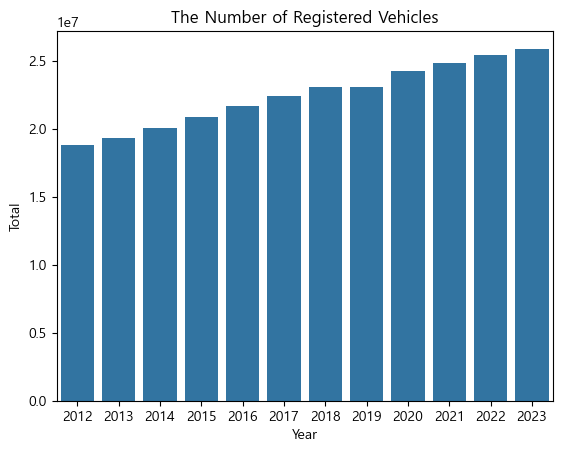

In [9]:
sns.barplot(
    data = df,
    x = 'Year',
    y = 'Total'
    ).set(
        title = 'The Number of Registered Vehicles'
        )

In [10]:
# 2번 : 자동차 등록 수 자료
# 기준 : 2023년 10월 31일

sql = '''
SELECT
  Year,
  Total
FROM
  project_1.Registration_EV
'''

In [11]:
df = client.query(sql).to_dataframe()
df

,Year,Total
0,2012,413
1,2013,436
2,2014,1452
3,2015,3559
4,2016,4605
5,2017,7447
6,2018,26791
7,2019,61258
8,2020,98446
9,2021,189664


[Text(0.5, 1.0, 'The Number of Registered EV')]

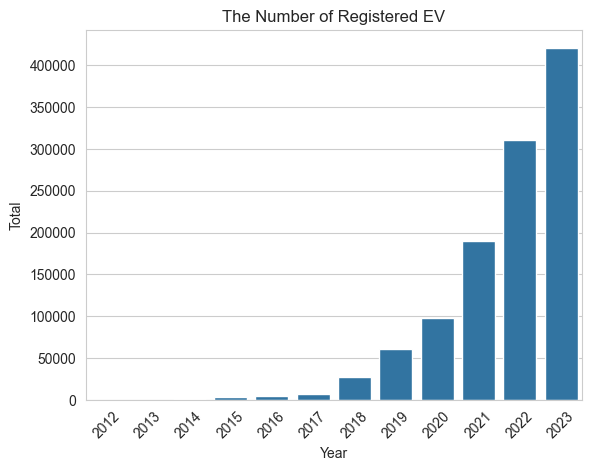

In [12]:
sns.set_style('whitegrid')
plt.xticks(rotation=45)
sns.barplot(
    data = df,
    x = 'Year',
    y = 'Total'
    ).set(
        title = 'The Number of Registered EV'
        )

In [13]:
# 3번 : 전체 고속도로 휴게소 충전소 수
# 기준 : 2023년 11월 14일[Text(0.5, 1.0, 'The Number of Registered EV')]


sql = '''
SELECT
  COUNT(Facility_2)
FROM
  project_1.ChargingStations
WHERE
  Facility_2 LIKE '%휴게소%'
'''

In [14]:
df = client.query(sql).to_dataframe()
df

,f0_
0,1390


In [15]:
# 전체 충전소 수
sql = '''
SELECT
  COUNT(Facility_2)
FROM
  project_1.ChargingStations
'''

In [16]:
df = client.query(sql).to_dataframe()
df

,f0_
0,265457


In [5]:
sql = '''
SELECT
  COUNT(Facility_2)
FROM
  project_1.ChargingStations
WHERE
  TYPE LIKE '%완속%'
'''

In [6]:
# 폰트 설정 방법 2
# import matplotlib
# import matplotlib.font_manager as fm

# fe = fm.FontEntry(
#     fname=r'./data/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
#     name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
# fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
# plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정


# fm.get_fontconfig_fonts()
# # font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
# font_location = './data/NanumGothic.ttf' # For Windows
# font_name = fm.FontProperties(fname=font_location).get_name()
# matplotlib.rc('font', family=font_name)

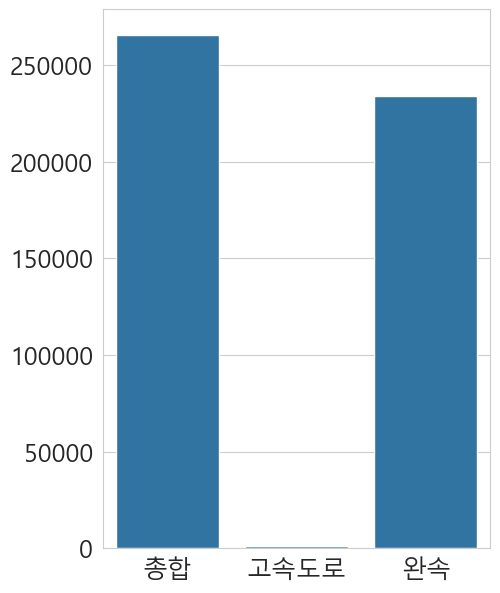

In [15]:
x = ['총합','고속도로','완속']
y = [265457,1390,233915]

plt.rc('font', family='Malgun Gothic')
# sns.set_style('whitegrid')
plt.figure(figsize=(5, 7))   # https://rfriend.tistory.com/710
bar = sns.barplot(x=x,y=y)

In [36]:
# 4번 : 고속도로 통행량
# 기준 : 2022년 일평균


sql = '''
SELECT
  Section,
  SUM(DailyAverage) AS DA
FROM
  project_1.Traffic_2022
GROUP BY
  Section
ORDER BY
  SUM(DailyAverage) DESC
LIMIT
  10
'''

In [37]:
df = client.query(sql).to_dataframe()
df

,Section,DA
0,신갈JC~수원신갈,230936
1,남사진위~안성JC,219215
2,안성JC~안성,206406
3,동탄JC~오산,205811
4,서울~신갈JC,204767
5,수원신갈~기흥,202461
6,오산~안성JC,199993
7,오산~남사진위,199293
8,북천안~천안,192403
9,서서울~안산JC,191079


[Text(0.5, 1.0, '고속도로 구간별 교통량 상위 10')]

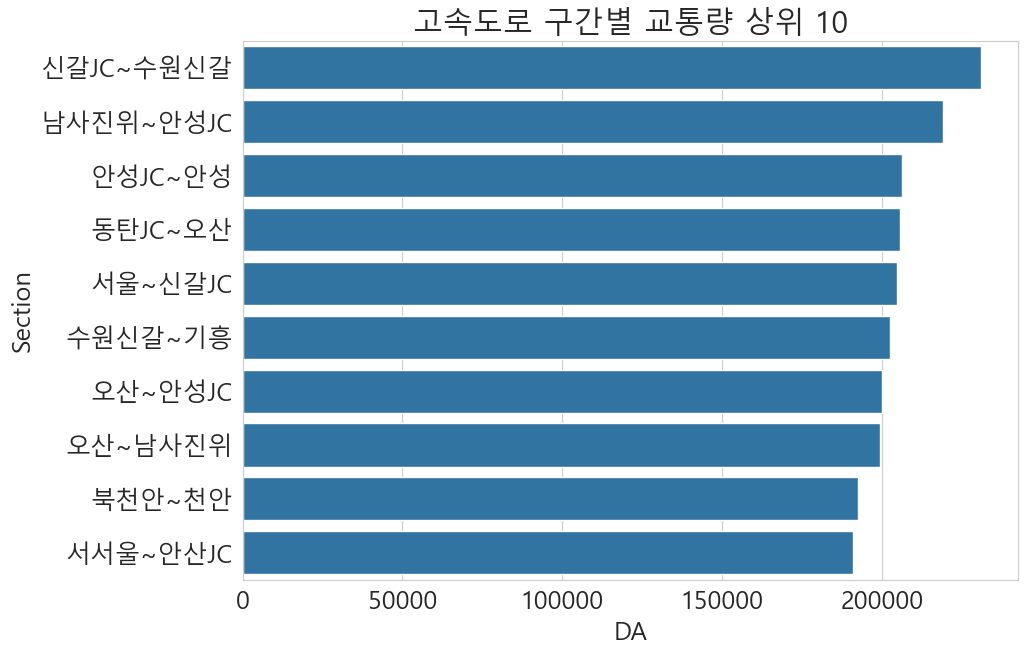

In [38]:
plt.figure(figsize=(10, 7))
sns.barplot(
    data=df,
    y='Section',
    x='DA'
).set(
    title = '고속도로 구간별 교통량 상위 10'
)

이건 좀 아니잖아...............
그래프 다 해봤는데 너무많아서 다 이상함
결론 : 못씀
그럼 우짜라고?

In [39]:
# 6번 : 휴게소 이용객
# 기준 : 23년 8월 24일

sql = '''
SELECT
  Rest_Area_Name,
  Daily_Visitors
FROM
  project_1.Traffic_RestArea
WHERE
  Daily_Visitors IS NOT NULL
ORDER BY
  Daily_Visitors DESC
LIMIT
  10
'''

In [40]:
df = client.query(sql).to_dataframe()
df

,Rest_Area_Name,Daily_Visitors
0,입장거봉포도(서울),30425
1,안성(부산),19540
2,천안삼거리(서울),19488
3,화성(목포),18970
4,선산(양평),18577
5,안성(서울),18381
6,죽전(서울),18253
7,여주(강릉),18032
8,선산(창원),17814
9,행담도,16911


[Text(0.5, 1.0, '휴게소 방문객 상위 10')]

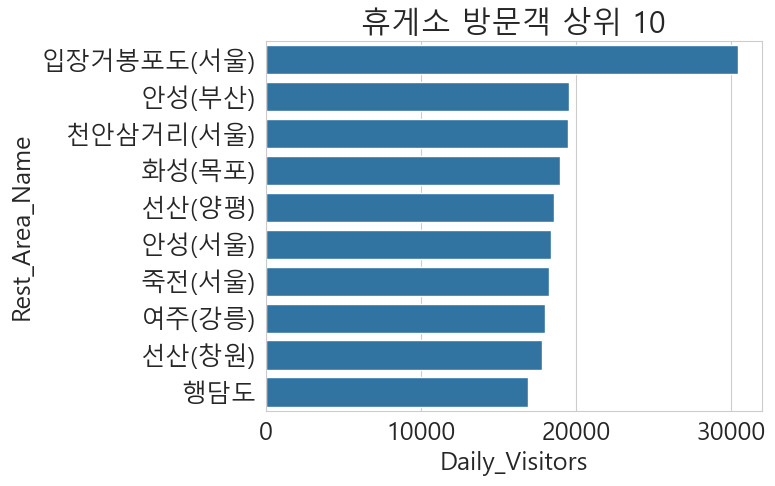

In [43]:
sns.barplot(
    data = df,
    y = 'Rest_Area_Name',
    x = 'Daily_Visitors'
).set(
    
    title = '휴게소 방문객 상위 10'
)

In [46]:
# 7번 : 고속도로 통행량

sql = '''
SELECT
  Route_Name,
  SUM(Traffic_Volume) AS traffic
FROM
  project_1.Traffic_2023_11_12
GROUP BY
  Route_Name
ORDER BY
  traffic DESC
LIMIT
 30
'''

In [47]:
df = client.query(sql).to_dataframe()
df

,Route_Name,traffic
0,경부선,5789176
1,영동선,3237706
2,중부선-대전통영선A,2575357
3,남해선A,2466450
4,서해안선,2241936
5,중부내륙선,1670689
6,호남선A,1347689
7,수도권제2순환선,1128954
8,중앙선,1114516
9,당진상주선,1108760


[Text(0.5, 1.0, '고속도로 교통량 상위 10')]

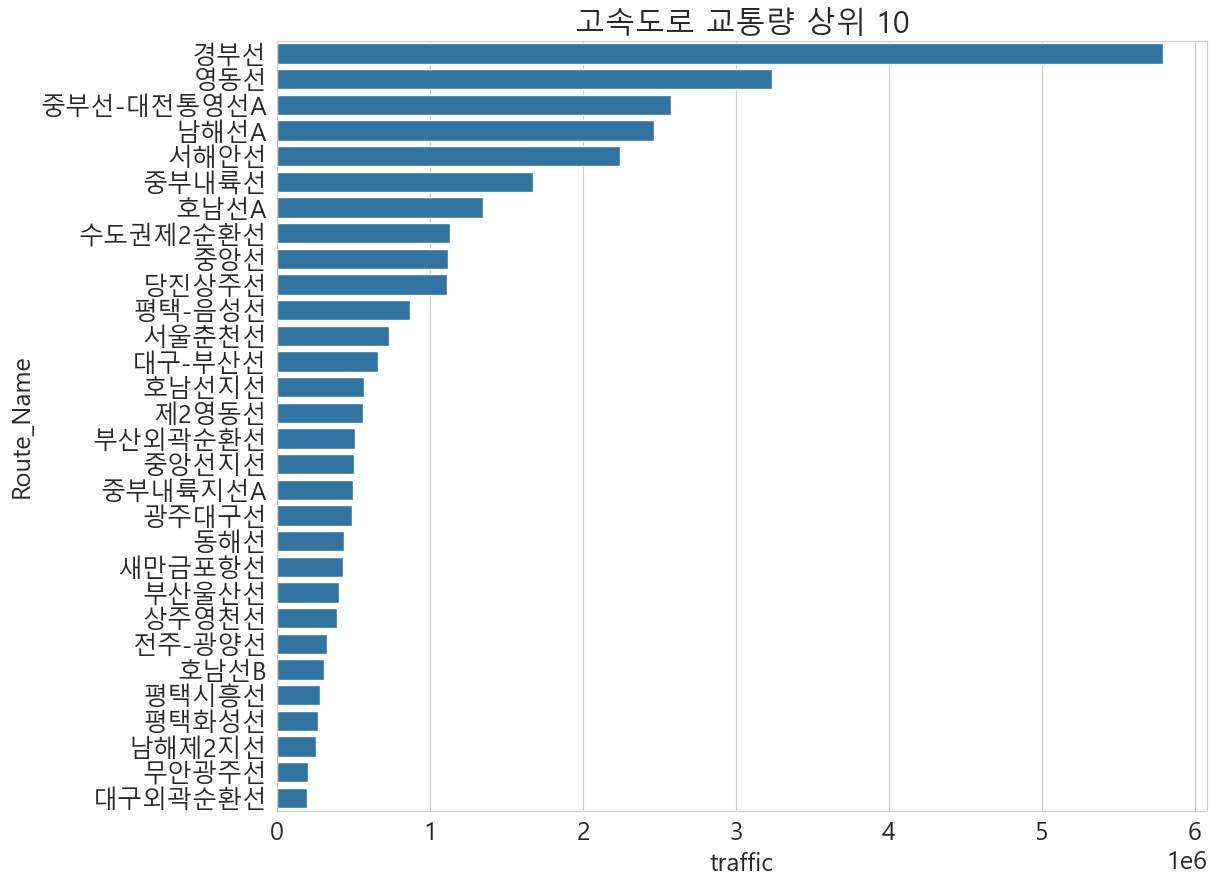

In [48]:
plt.figure(figsize=(12, 10))
sns.barplot(
    data = df,
    x = 'traffic',
    y = 'Route_Name'
).set(
    
    title = '고속도로 교통량 상위 10'
)